# Housing Price Predictions with Melbourne Housing Dataset

## Gathering and Observing Data

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("Melbourne_housing_FULL.csv")
df_copy = df.copy()
df.head()

Suburb             Address  Rooms Type      Price Method SellerG  \
0  Abbotsford       68 Studley St      2    h        NaN     SS  Jellis   
1  Abbotsford        85 Turner St      2    h  1480000.0      S  Biggin   
2  Abbotsford     25 Bloomburg St      2    h  1035000.0      S  Biggin   
3  Abbotsford  18/659 Victoria St      3    u        NaN     VB  Rounds   
4  Abbotsford        5 Charles St      3    h  1465000.0     SP  Biggin   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/09/2016       2.5    3067.0  ...       1.0  1.0     126.0           NaN   
1  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
2  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
3  4/02/2016       2.5    3067.0  ...       2.0  1.0       0.0           NaN   
4  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   

   YearBuilt         CouncilArea Lattitude  Longtitude             Regionname  \
0        NaN  Yarra City Council  -37.8014    144.9958  Northern Metropolitan   
1        NaN  Yarra City Council  -37.7996    144.9984  Northern Metropolitan   
2     1900.0  Yarra City Council  -37.8079    144.9934  Northern Metropolitan   
3        NaN  Yarra City Council  -37.8114    145.0116  Northern Metropolitan   
4     1900.0  Yarra City Council  -37.8093    144.9944  Northern Metropolitan   

  Propertycount  
0        4019.0  
1        4019.0  
2        4019.0  
3        4019.0  
4        4019.0  

[5 rows x 21 columns]

In [3]:
print(f'Shape     : {df.shape}\n'
      f'Size      : {df.size}\n'
      f'Dimension : {df.ndim}')

Shape     : (34857, 21)
Size      : 731997
Dimension : 2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti


## Exploratory Data Analysis

In [5]:
df.describe().T

count          mean            std          min  \
Rooms          34857.0  3.031012e+00       0.969933      1.00000   
Price          27247.0  1.050173e+06  641467.130105  85000.00000   
Distance       34856.0  1.118493e+01       6.788892      0.00000   
Postcode       34856.0  3.116063e+03     109.023903   3000.00000   
Bedroom2       26640.0  3.084647e+00       0.980690      0.00000   
Bathroom       26631.0  1.624798e+00       0.724212      0.00000   
Car            26129.0  1.728845e+00       1.010771      0.00000   
Landsize       23047.0  5.935990e+02    3398.841946      0.00000   
BuildingArea   13742.0  1.602564e+02     401.267060      0.00000   
YearBuilt      15551.0  1.965290e+03      37.328178   1196.00000   
Lattitude      26881.0 -3.781063e+01       0.090279    -38.19043   
Longtitude     26881.0  1.450019e+02       0.120169    144.42379   
Propertycount  34854.0  7.572888e+03    4428.090313     83.00000   

                        25%          50%           75%           max  
Rooms               2.00000       3.0000  4.000000e+00  1.600000e+01  
Price          635000.00000  870000.0000  1.295000e+06  1.120000e+07  
Distance            6.40000      10.3000  1.400000e+01  4.810000e+01  
Postcode         3051.00000    3103.0000  3.156000e+03  3.978000e+03  
Bedroom2            2.00000       3.0000  4.000000e+00  3.000000e+01  
Bathroom            1.00000       2.0000  2.000000e+00  1.200000e+01  
Car                 1.00000       2.0000  2.000000e+00  2.600000e+01  
Landsize          224.00000     521.0000  6.700000e+02  4.330140e+05  
BuildingArea      102.00000     136.0000  1.880000e+02  4.451500e+04  
YearBuilt        1940.00000    1970.0000  2.000000e+03  2.106000e+03  
Lattitude         -37.86295     -37.8076 -3.775410e+01 -3.739020e+01  
Longtitude        144.93350     145.0078  1.450719e+02  1.455264e+02  
Propertycount    4385.00000    6763.0000  1.041200e+04  2.165000e+04

In [6]:
num_cols = [col for col in df.columns if df[col].dtype in ['float64','int64']]

In [7]:
cat_cols = [col for col in df.columns if df[col].dtype not in ['float64','int64']]

In [8]:
df.duplicated().sum()

1

In [9]:
df = df.drop_duplicates()

In [10]:
df['zscoreLandsize'] = ( df["Landsize"] - df["Landsize"].mean() ) / df["Landsize"].std()
df['zscoreBuildingArea'] = ( df["Landsize"] - df["Landsize"].mean() ) / df["Landsize"].std()

In [11]:
df

Suburb             Address  Rooms Type      Price Method  \
0      Abbotsford       68 Studley St      2    h        NaN     SS   
1      Abbotsford        85 Turner St      2    h  1480000.0      S   
2      Abbotsford     25 Bloomburg St      2    h  1035000.0      S   
3      Abbotsford  18/659 Victoria St      3    u        NaN     VB   
4      Abbotsford        5 Charles St      3    h  1465000.0     SP   
...           ...                 ...    ...  ...        ...    ...   
34852  Yarraville         13 Burns St      4    h  1480000.0     PI   
34853  Yarraville       29A Murray St      2    h   888000.0     SP   
34854  Yarraville      147A Severn St      2    t   705000.0      S   
34855  Yarraville    12/37 Stephen St      3    h  1140000.0     SP   
34856  Yarraville    3 Tarrengower St      2    h  1020000.0     PI   

             SellerG        Date  Distance  Postcode  ...  Landsize  \
0             Jellis   3/09/2016       2.5    3067.0  ...     126.0   
1             Biggin   3/12/2016       2.5    3067.0  ...     202.0   
2             Biggin   4/02/2016       2.5    3067.0  ...     156.0   
3             Rounds   4/02/2016       2.5    3067.0  ...       0.0   
4             Biggin   4/03/2017       2.5    3067.0  ...     134.0   
...              ...         ...       ...       ...  ...       ...   
34852            Jas  24/02/2018       6.3    3013.0  ...     593.0   
34853        Sweeney  24/02/2018       6.3    3013.0  ...      98.0   
34854            Jas  24/02/2018       6.3    3013.0  ...     220.0   
34855  hockingstuart  24/02/2018       6.3    3013.0  ...       NaN   
34856             RW  24/02/2018       6.3    3013.0  ...     250.0   

       BuildingArea  YearBuilt               CouncilArea  Lattitude  \
0               NaN        NaN        Yarra City Council  -37.80140   
1               NaN        NaN        Yarra City Council  -37.79960   
2              79.0     1900.0        Yarra City Council  -37.80790   
3               NaN        NaN        Yarra City Council  -37.81140   
4             150.0     1900.0        Yarra City Council  -37.80930   
...             ...        ...                       ...        ...   
34852           NaN        NaN  Maribyrnong City Council  -37.81053   
34853         104.0     2018.0  Maribyrnong City Council  -37.81551   
34854         120.0     2000.0  Maribyrnong City Council  -37.82286   
34855           NaN        NaN  Maribyrnong City Council        NaN   
34856         103.0     1930.0  Maribyrnong City Council  -37.81810   

       Longtitude             Regionname  Propertycount  zscoreLandsize  \
0       144.99580  Northern Metropolitan         4019.0       -0.137575   
1       144.99840  Northern Metropolitan         4019.0       -0.115215   
2       144.99340  Northern Metropolitan         4019.0       -0.128749   
3       145.01160  Northern Metropolitan         4019.0       -0.174646   
4       144.99440  Northern Metropolitan         4019.0       -0.135222   
...           ...                    ...            ...             ...   
34852   144.88467   Western Metropolitan         6543.0       -0.000179   
34853   144.88826   Western Metropolitan         6543.0       -0.145813   
34854   144.87856   Western Metropolitan         6543.0       -0.109920   
34855         NaN   Western Metropolitan         6543.0             NaN   
34856   144.89351   Western Metropolitan         6543.0       -0.101093   

      zscoreBuildingArea  
0              -0.137575  
1              -0.115215  
2              -0.128749  
3              -0.174646  
4              -0.135222  
...                  ...  
34852          -0.000179  
34853          -0.145813  
34854          -0.109920  
34855                NaN  
34856          -0.101093  

[34856 rows x 23 columns]

In [12]:
df = df[(df.zscoreLandsize>-3) & (df.zscoreLandsize<3)]

In [13]:
df = df[(df.zscoreBuildingArea>-3) & (df.zscoreBuildingArea<3)]

In [16]:
df

Suburb             Address  Rooms Type      Price Method  SellerG  \
0      Abbotsford       68 Studley St      2    h        NaN     SS   Jellis   
1      Abbotsford        85 Turner St      2    h  1480000.0      S   Biggin   
2      Abbotsford     25 Bloomburg St      2    h  1035000.0      S   Biggin   
3      Abbotsford  18/659 Victoria St      3    u        NaN     VB   Rounds   
4      Abbotsford        5 Charles St      3    h  1465000.0     SP   Biggin   
...           ...                 ...    ...  ...        ...    ...      ...   
34851  Yarraville       78 Bayview Rd      3    h  1101000.0      S      Jas   
34852  Yarraville         13 Burns St      4    h  1480000.0     PI      Jas   
34853  Yarraville       29A Murray St      2    h   888000.0     SP  Sweeney   
34854  Yarraville      147A Severn St      2    t   705000.0      S      Jas   
34856  Yarraville    3 Tarrengower St      2    h  1020000.0     PI       RW   

             Date  Distance  Postcode  ...  Landsize  BuildingArea  YearBuilt  \
0       3/09/2016       2.5    3067.0  ...     126.0           NaN        NaN   
1       3/12/2016       2.5    3067.0  ...     202.0           NaN        NaN   
2       4/02/2016       2.5    3067.0  ...     156.0          79.0     1900.0   
3       4/02/2016       2.5    3067.0  ...       0.0           NaN        NaN   
4       4/03/2017       2.5    3067.0  ...     134.0         150.0     1900.0   
...           ...       ...       ...  ...       ...           ...        ...   
34851  24/02/2018       6.3    3013.0  ...     288.0           NaN        NaN   
34852  24/02/2018       6.3    3013.0  ...     593.0           NaN        NaN   
34853  24/02/2018       6.3    3013.0  ...      98.0         104.0     2018.0   
34854  24/02/2018       6.3    3013.0  ...     220.0         120.0     2000.0   
34856  24/02/2018       6.3    3013.0  ...     250.0         103.0     1930.0   

                    CouncilArea  Lattitude  Longtitude             Regionname  \
0            Yarra City Council  -37.80140   144.99580  Northern Metropolitan   
1            Yarra City Council  -37.79960   144.99840  Northern Metropolitan   
2            Yarra City Council  -37.80790   144.99340  Northern Metropolitan   
3            Yarra City Council  -37.81140   145.01160  Northern Metropolitan   
4            Yarra City Council  -37.80930   144.99440  Northern Metropolitan   
...                         ...        ...         ...                    ...   
34851  Maribyrnong City Council  -37.81095   144.88516   Western Metropolitan   
34852  Maribyrnong City Council  -37.81053   144.88467   Western Metropolitan   
34853  Maribyrnong City Council  -37.81551   144.88826   Western Metropolitan   
34854  Maribyrnong City Council  -37.82286   144.87856   Western Metropolitan   
34856  Maribyrnong City Council  -37.81810   144.89351   Western Metropolitan   

       Propertycount  zscoreLandsize zscoreBuildingArea  
0             4019.0       -0.137575          -0.137575  
1             4019.0       -0.115215          -0.115215  
2             4019.0       -0.128749          -0.128749  
3             4019.0       -0.174646          -0.174646  
4             4019.0       -0.135222          -0.135222  
...              ...             ...                ...  
34851         6543.0       -0.089913          -0.089913  
34852         6543.0       -0.000179          -0.000179  
34853         6543.0       -0.145813          -0.145813  
34854         6543.0       -0.109920          -0.109920  
34856         6543.0       -0.101093          -0.101093  

[23003 rows x 23 columns]

In [17]:
df = df.drop(['zscoreLandsize', 'zscoreBuildingArea'], axis=1)

In [18]:
df.head()

Suburb             Address  Rooms Type      Price Method SellerG  \
0  Abbotsford       68 Studley St      2    h        NaN     SS  Jellis   
1  Abbotsford        85 Turner St      2    h  1480000.0      S  Biggin   
2  Abbotsford     25 Bloomburg St      2    h  1035000.0      S  Biggin   
3  Abbotsford  18/659 Victoria St      3    u        NaN     VB  Rounds   
4  Abbotsford        5 Charles St      3    h  1465000.0     SP  Biggin   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/09/2016       2.5    3067.0  ...       1.0  1.0     126.0           NaN   
1  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
2  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
3  4/02/2016       2.5    3067.0  ...       2.0  1.0       0.0           NaN   
4  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   

   YearBuilt         CouncilArea Lattitude  Longtitude             Regionname  \
0        NaN  Yarra City Council  -37.8014    144.9958  Northern Metropolitan   
1        NaN  Yarra City Council  -37.7996    144.9984  Northern Metropolitan   
2     1900.0  Yarra City Council  -37.8079    144.9934  Northern Metropolitan   
3        NaN  Yarra City Council  -37.8114    145.0116  Northern Metropolitan   
4     1900.0  Yarra City Council  -37.8093    144.9944  Northern Metropolitan   

  Propertycount  
0        4019.0  
1        4019.0  
2        4019.0  
3        4019.0  
4        4019.0  

[5 rows x 21 columns]

In [19]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             5054
Method               0
SellerG              0
Date                 0
Distance             0
Postcode             0
Bedroom2             7
Bathroom            12
Car                374
Landsize             0
BuildingArea     10881
YearBuilt         9314
CouncilArea          0
Lattitude           26
Longtitude          26
Regionname           0
Propertycount        0
dtype: int64

In [22]:
df['Car'] = df['Car'].fillna(df['Car'].mode()[0])
df['Bathroom'] = df['Bathroom'].fillna(df['Bathroom'].mode()[0])

In [50]:
df.dropna(inplace=True)

In [38]:
df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

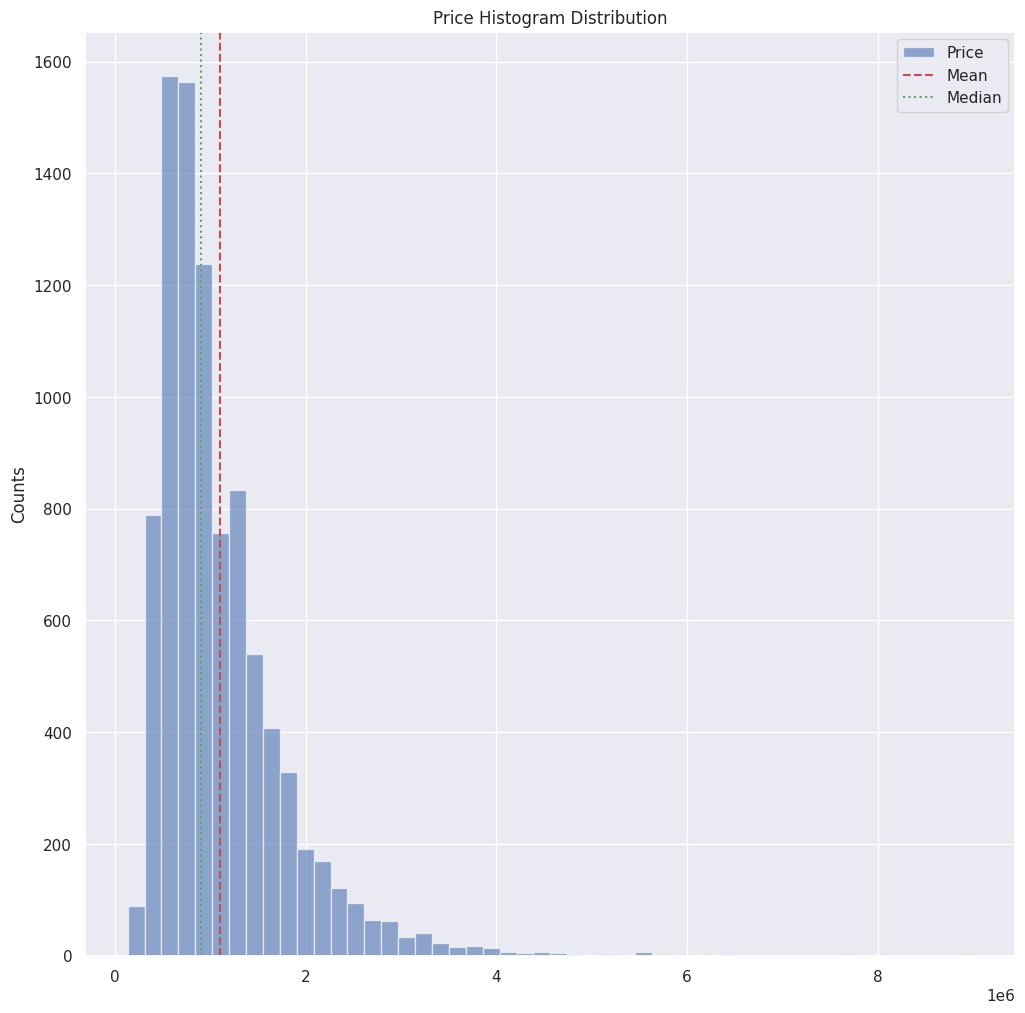

In [39]:
df['Price'].hist(bins=50, label='Price', alpha=0.6)
plt.axvline(np.mean(df['Price']), ls='--', c='r', label="Mean")
plt.axvline(np.median(df['Price']), ls=':', c='g', label="Median")
plt.ylabel("Counts")
plt.title("Price Histogram Distribution");
plt.legend()

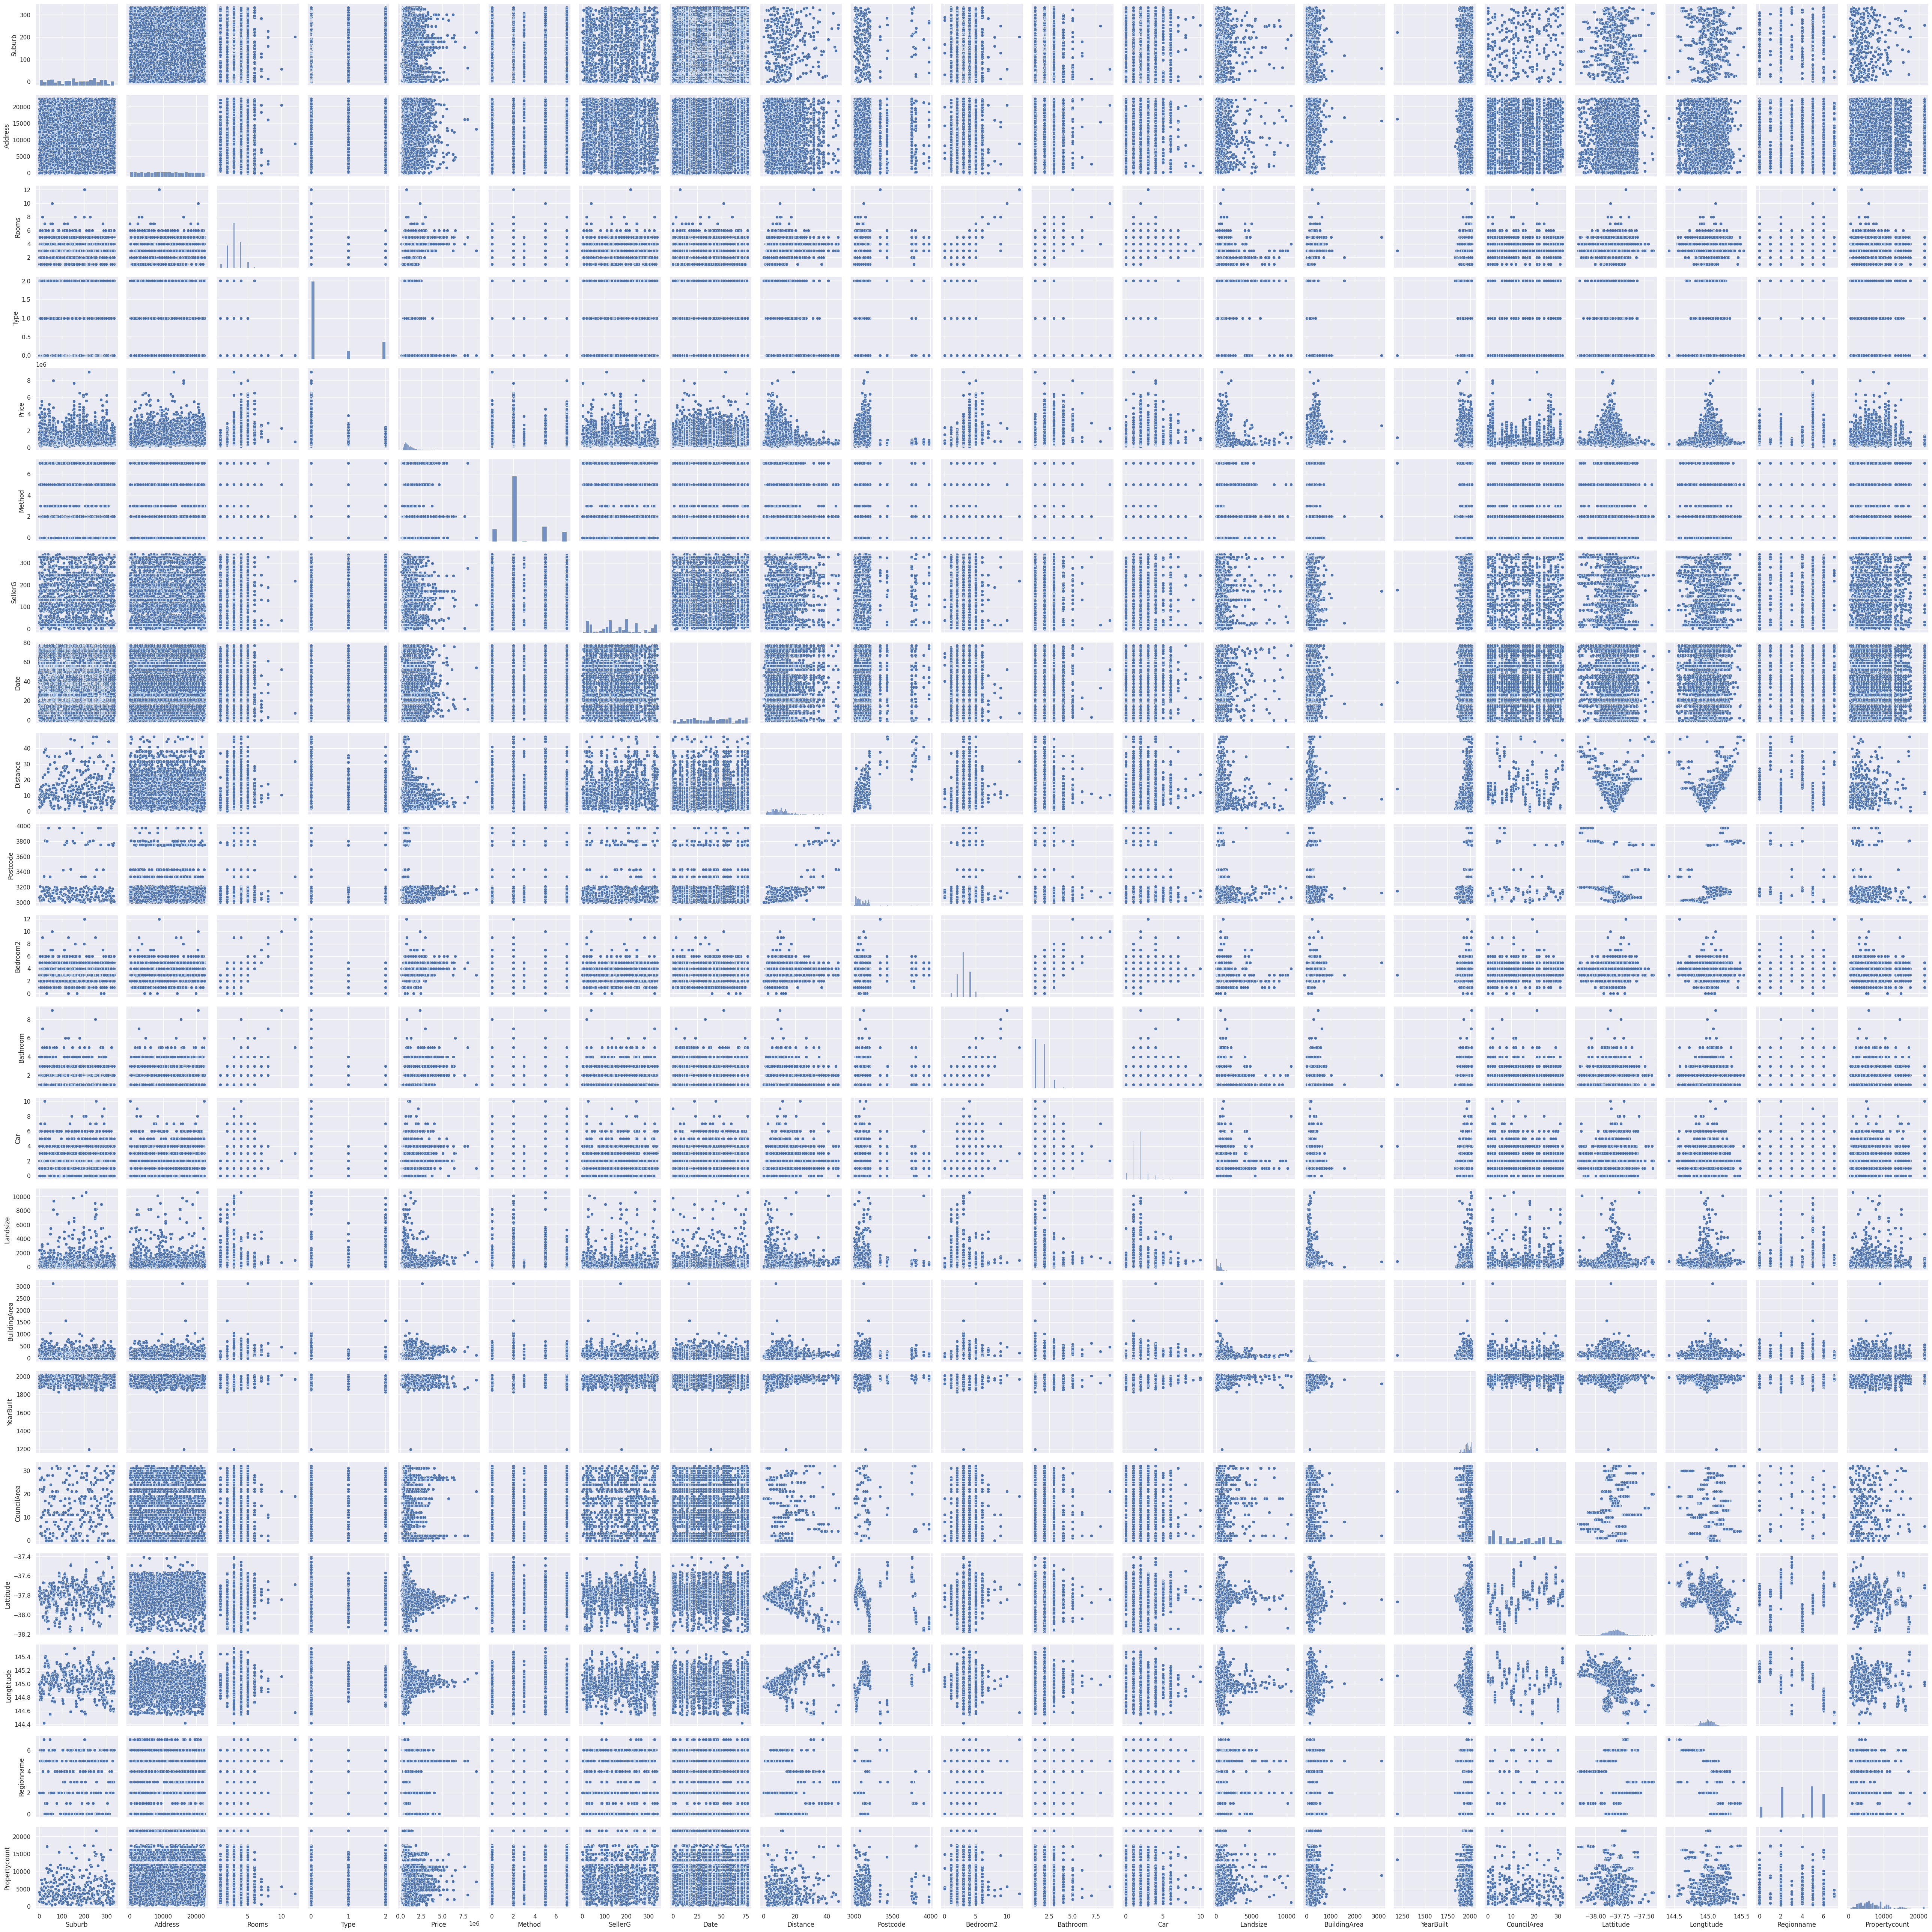

In [40]:
sns.pairplot(df)

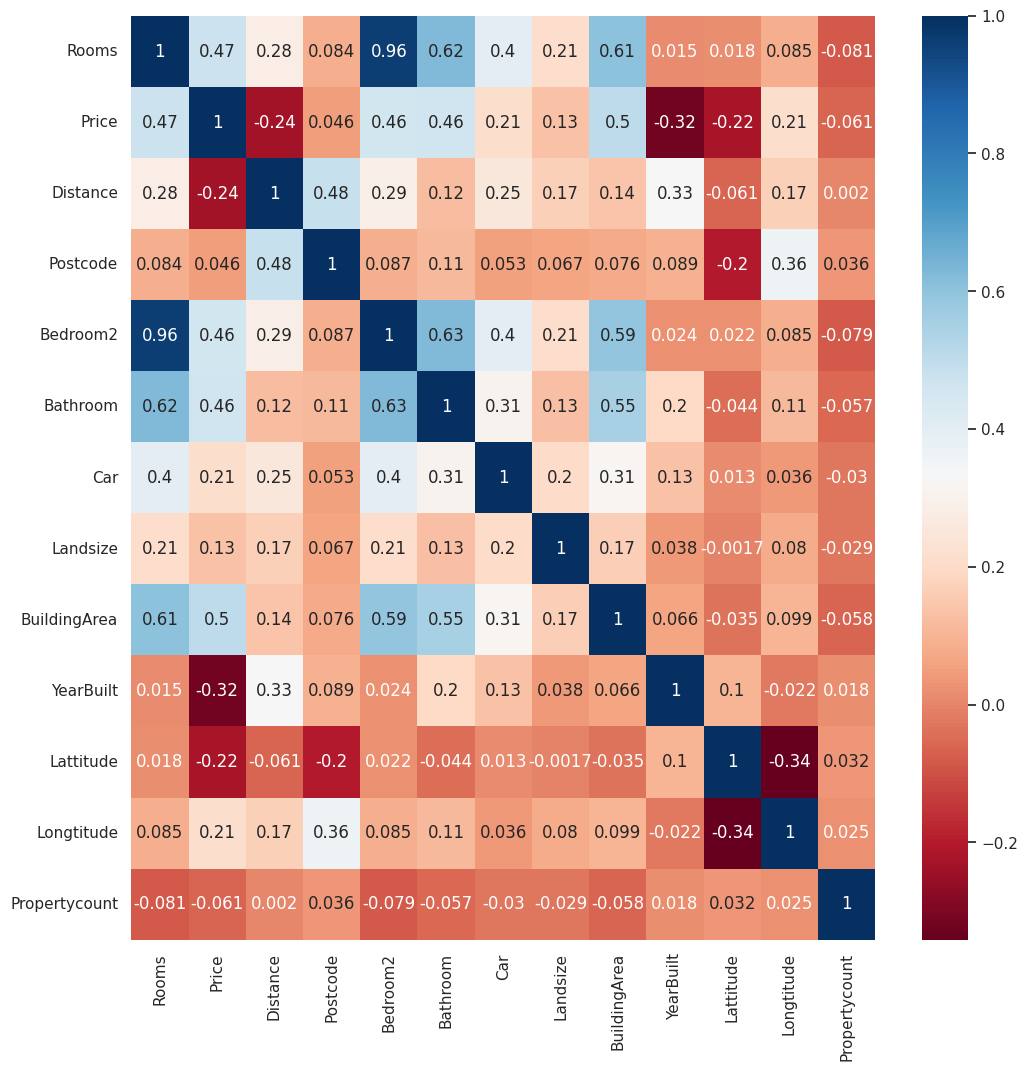

In [41]:
corr = df[num_cols].corr()
sns.set(rc={"figure.figsize": (12, 12)})
sns.heatmap(corr, cmap="RdBu", annot=True)
plt.show()

In [43]:
label_encoder = LabelEncoder()
df['Suburb'] = label_encoder.fit_transform(df['Suburb'])
df['Address'] = label_encoder.fit_transform(df['Address'])
df['Type'] = label_encoder.fit_transform(df['Type'])
df['Method'] = label_encoder.fit_transform(df['Method'])
df['SellerG'] = label_encoder.fit_transform(df['SellerG'])
df['Date'] = label_encoder.fit_transform(df['Date'])
df['CouncilArea'] = label_encoder.fit_transform(df['CouncilArea'])
df['Regionname'] = label_encoder.fit_transform(df['Regionname'])

In [44]:
df.head()

Suburb  Address  Rooms  Type      Price  Method  SellerG  Date  Distance  \
2        0     3974      2     0  1035000.0       1       22    62       2.5   
4        0     6546      3     0  1465000.0       3       22    63       2.5   
6        0     7056      4     0  1600000.0       4      147    64       2.5   
11       0     1390      3     0  1876000.0       1      147    69       2.5   
14       0     8859      2     0  1636000.0       1      147    74       2.5   

    Postcode  ...  Bathroom  Car  Landsize  BuildingArea  YearBuilt  \
2     3067.0  ...       1.0  0.0     156.0          79.0     1900.0   
4     3067.0  ...       2.0  0.0     134.0         150.0     1900.0   
6     3067.0  ...       1.0  2.0     120.0         142.0     2014.0   
11    3067.0  ...       2.0  0.0     245.0         210.0     1910.0   
14    3067.0  ...       1.0  2.0     256.0         107.0     1890.0   

    CouncilArea  Lattitude  Longtitude  Regionname  Propertycount  
2            31   -37.8079    144.9934           2         4019.0  
4            31   -37.8093    144.9944           2         4019.0  
6            31   -37.8072    144.9941           2         4019.0  
11           31   -37.8024    144.9993           2         4019.0  
14           31   -37.8060    144.9954           2         4019.0  

[5 rows x 21 columns]

# Model Selection

In [45]:
X = df.drop(["Price"], axis = 1)
y = df["Price"]

In [46]:
y

2        1035000.0
4        1465000.0
6        1600000.0
11       1876000.0
14       1636000.0
           ...    
34847     500000.0
34849     570000.0
34853     888000.0
34854     705000.0
34856    1020000.0
Name: Price, Length: 9008, dtype: float64

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
models = {
    'Lasso': {
        'model': Lasso()
    },
    'LinearRegression': {
        'model': LinearRegression()
    },
    'Ridge': {
        'model': Ridge()
    },
    'ElasticNet': {
        'model': ElasticNet()
    },
    'KNeighborsRegressor': {
        'model': KNeighborsRegressor()
    },
    'RandomForestRegressor': {
        'model': RandomForestRegressor()
    },
    'GradientBoostingRegressor': {
        'model': GradientBoostingRegressor()
    },
    'AdaBoostRegressor': {
        'model': AdaBoostRegressor()
    }

}

# Model Evaluation

In [55]:
for x in models:
    models[x]['prediction'] = None
    models[x]['evaluation'] = {
        'mae': None,
        'mse': None,
        'rmse': None,
        'r2': None
    }

    print("Model:", models[x]["model"])
    models[x]['model'].fit(X_train, y_train)
    models[x]['prediction'] = models[x]['model'].predict(X_test)
    models[x]['evaluation']['mae'] = metrics.mean_absolute_error(y_test, models[x]['prediction'])
    models[x]['evaluation']['mse'] = metrics.mean_squared_error(y_test, models[x]['prediction'])
    models[x]['evaluation']['rmse'] = np.sqrt(models[x]['evaluation']['mse'])
    models[x]['evaluation']['r2'] = metrics.r2_score(y_test, models[x]['prediction'])
    print('MAE: ', models[x]['evaluation']['mae'])
    print('MSE: ', models[x]['evaluation']['mse'])
    print('RMSE: ', models[x]['evaluation']['rmse'])
    print('R2: ', models[x]['evaluation']['r2'])
    print("\n")

Model: Lasso()
MAE:  261525.79526887872
MSE:  148981795973.46683
RMSE:  385981.60056337767
R2:  0.6588606562124207


Model: LinearRegression()
MAE:  261526.37184646493
MSE:  148981893043.23648
RMSE:  385981.7263073946
R2:  0.658860433941523


Model: Ridge()
MAE:  261473.33602315327
MSE:  148978131054.8611
RMSE:  385976.85300398665
R2:  0.6588690481633971


Model: ElasticNet()
MAE:  276031.713282006
MSE:  164120906265.68234
RMSE:  405118.38549451483
R2:  0.6241950373905483


Model: KNeighborsRegressor()
MAE:  377643.053718091
MSE:  289557745685.49835
RMSE:  538105.7012200283
R2:  0.3369690658759814


Model: RandomForestRegressor()
MAE:  160658.39093784685
MSE:  65488921426.01338
RMSE:  255908.03314084024
R2:  0.8500431040272506


Model: GradientBoostingRegressor()
MAE:  169687.89729547114
MSE:  68269948094.73963
RMSE:  261285.18537173062
R2:  0.8436750937168231


Model: AdaBoostRegressor()
MAE:  484553.70748693036
MSE:  305771875765.42377
RMSE:  552966.4327655195
R2:  0.299841860774109
